In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('D:\data science\creditcard.csv')

In [15]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:

#get some info
df.describe()
df.info() #no missing values


#analyse the fraud and non-fraud cases
print('no.of non-fraud are ', round(df['Class'].value_counts()[0]/len(df)*100,2),'%percent of dataset')
print('no of fraud are, ', round(df['Class'].value_counts()[1]/len(df)*100,2),'%percent of dataset')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

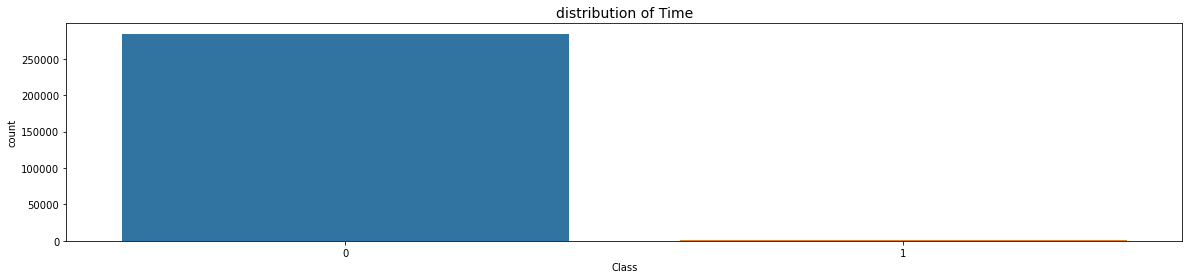

In [17]:
#we can se that there is an imbalance in the dataset

#lets plot to know more:
fig,ax= plt.subplots(1,1,figsize=(20,4)) 
sns.countplot(x=df['Class'],data=df, ax=ax)
ax.set_title('distribution of Time', fontsize=14)
ax.set_xlim([min(df['Time'], max(df['Time']))])
plt.title('count of fraud and non-fraud')
plt.show()

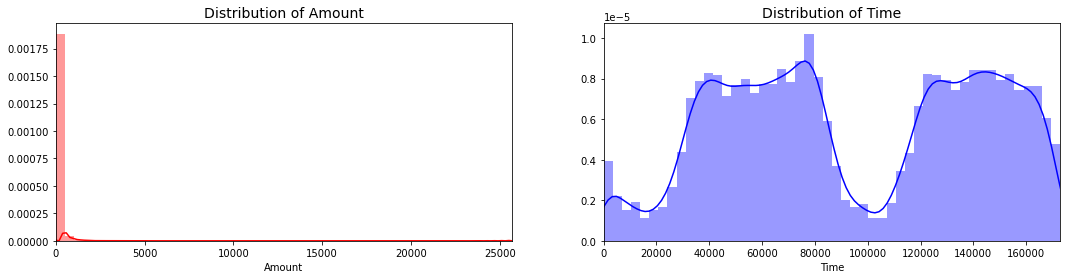

In [24]:
#this is indeed the proof for imbalance in the dataset
#lets see how time and amount are distributed
fig,ax=plt.subplots(1,2, figsize=(18,4))
sns.distplot(df['Amount'], ax=ax1[0],color='r')
ax[0].set_title('Distribution of Amount', fontsize=14)
ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])

.distplot(df['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Time', fontsize=14)
ax[1].set_xlim([min(df['Time']), max(df['Time'])])
plt.show()

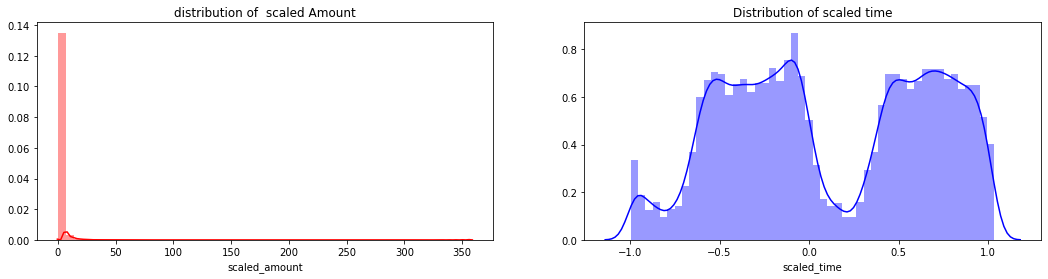

In [25]:

#lets scale the amount and time values
std_scaler=StandardScaler()
robust_scaler=RobustScaler()
df['scaled_amount']= robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']= robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_time=df['scaled_time'].values
scaled_amount=df['scaled_amount'].values
df.drop(['scaled_time','scaled_amount'], axis=1, inplace=True)

#bringing it to the beginning
df.insert(0,'scaled_time',scaled_time)
df.insert(1,'scaled_amount', scaled_amount)



fig,ax=plt.subplots(1,2,figsize=(18,4))
sns.distplot(df['scaled_amount'], ax=ax[0],color='r')
ax[0].set_title('distribution of  scaled Amount')

sns.distplot(df['scaled_time'],ax=ax[1], color='b')
ax[1].set_title('Distribution of scaled time')
plt.show()

In [26]:
sss=StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

for train_index, test_index in sss.split(X,y):
    print('train:', train_index, 'test:', test_index)
    original_X_train,original_X_test= X.iloc[train_index],X.iloc[test_index]
    original_y_train, original_y_test=y.iloc[train_index], y.iloc[test_index]
    

train: [     0      1      3 ... 284804 284805 284806] test: [     2     20     24 ... 284791 284793 284798]
train: [     0      1      2 ... 284804 284805 284806] test: [     3      9     13 ... 284794 284799 284803]
train: [     0      1      2 ... 284801 284802 284803] test: [    11     12     16 ... 284804 284805 284806]
train: [     0      2      3 ... 284804 284805 284806] test: [     1      4      6 ... 284796 284801 284802]
train: [     1      2      3 ... 284804 284805 284806] test: [     0      5      7 ... 284782 284790 284795]


1    0.5
0    0.5
Name: Class, dtype: float64


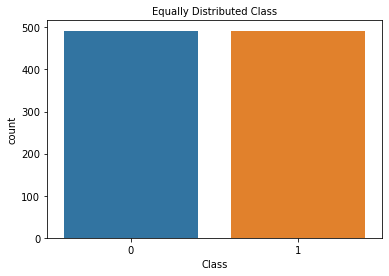

In [27]:

#implementing random under sampling to have a balanced dataset

df=df.sample(frac=1)

fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]

normal_df=pd.concat([fraud_df, non_fraud_df])
new_df= normal_df.sample(frac=1, random_state=42)
new_df.head()
colors=[]
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot('Class',data=new_df)
plt.title('Equally Distributed Class', fontsize=10)
plt.show()

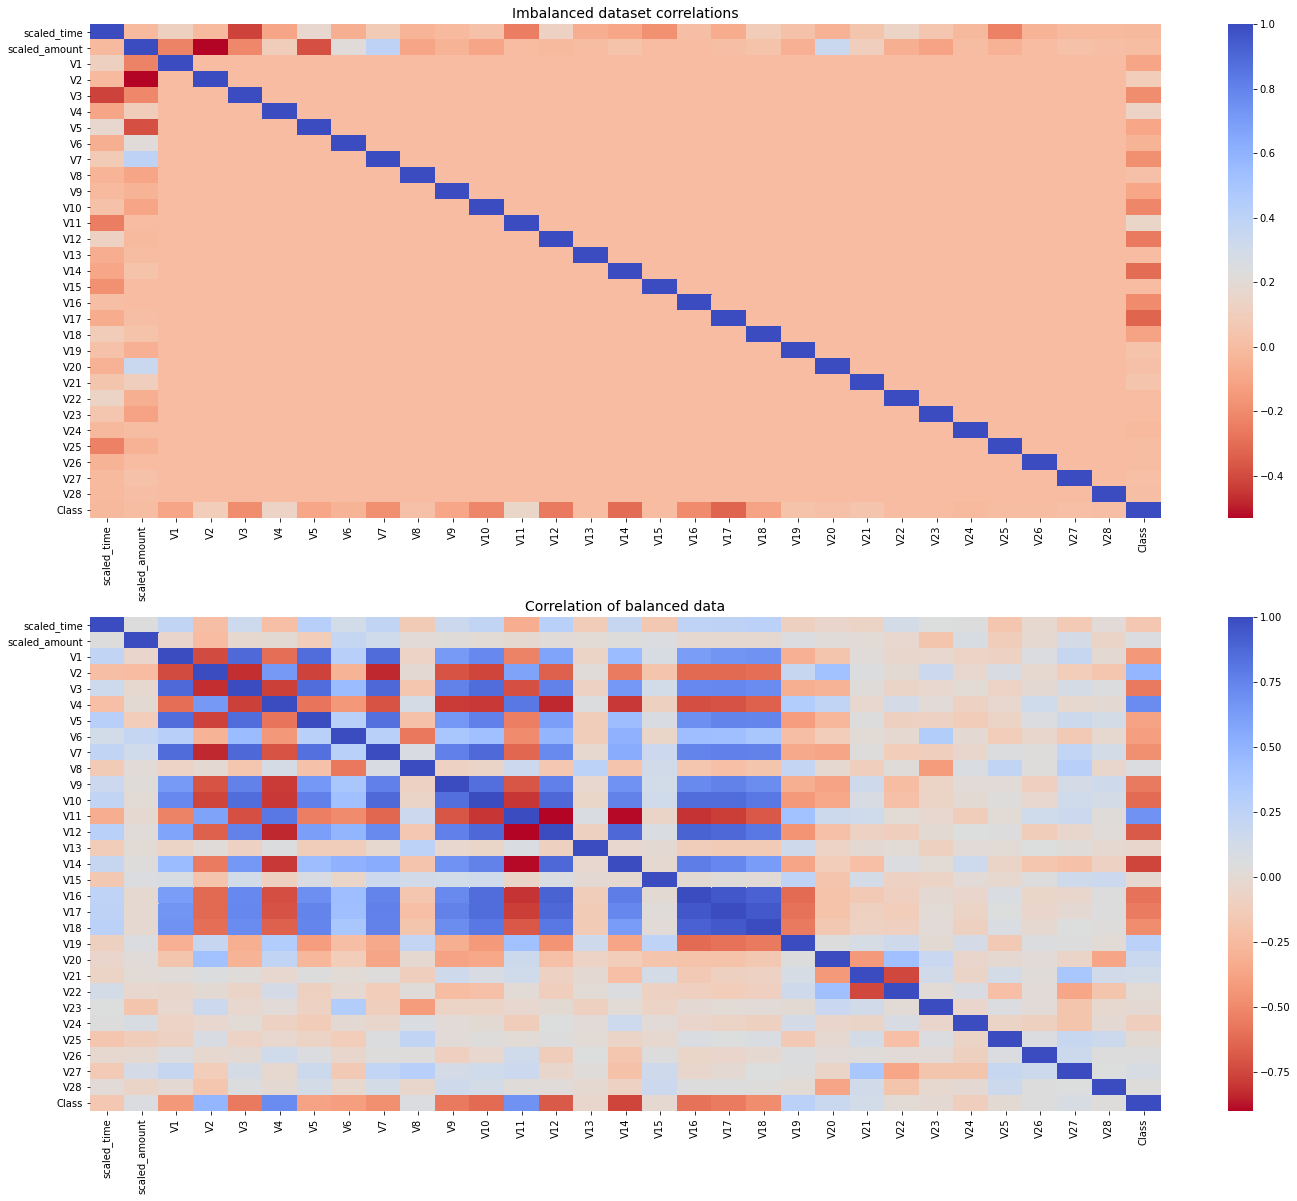

In [28]:

#correlation matrix
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(24,20))
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'size':20}, ax=ax1)
ax1.set_title('Imbalanced dataset correlations', fontsize=14)

sample_corr=new_df.corr()
sns.heatmap(sample_corr, cmap='coolwarm_r', annot_kws={'size':20},ax=ax2)
ax2.set_title('Correlation of balanced data', fontsize=14)
plt.show()
#we can see that in the imbalanced dataset we can merely see any correlation but in
# the second corr, we can see a couple of correlation

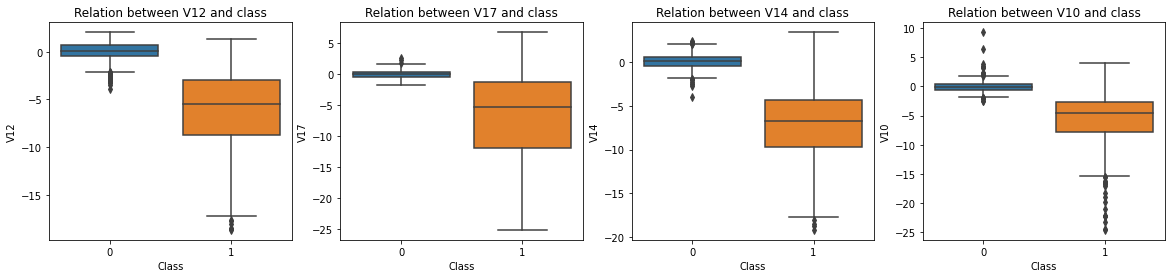

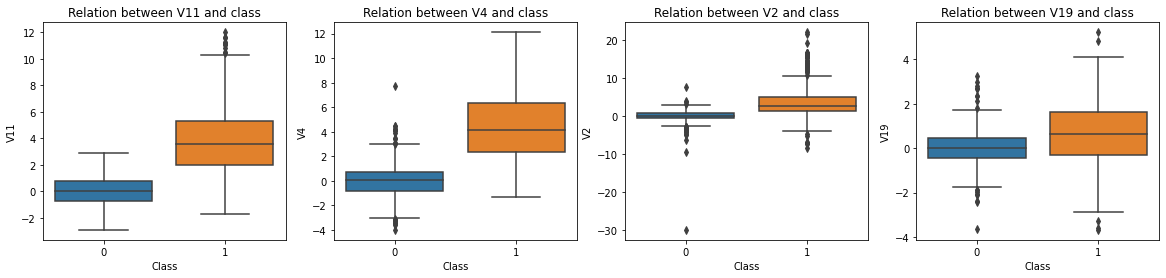

In [29]:

#lets see the negative and positive correlation using a box plot
#negative corrleation
fig, axes= plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x='Class', y='V12', data=new_df, ax=axes[0])
axes[0].set_title('Relation between V12 and class')

sns.boxplot(x='Class', y='V17', data=new_df, ax=axes[1])
axes[1].set_title('Relation between V17 and class')

sns.boxplot(x='Class', y='V14', data=new_df,ax=axes[2])
axes[2].set_title('Relation between V14 and class')

sns.boxplot(x='Class', y='V10', data=new_df, ax=axes[3])
axes[3].set_title('Relation between V10 and class')

plt.show()

#positve correlations:
fig, axes= plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x='Class', y='V11', data=new_df, ax=axes[0])
axes[0].set_title('Relation between V11 and class')

sns.boxplot(x='Class', y='V4', data=new_df, ax=axes[1])
axes[1].set_title('Relation between V4 and class')

sns.boxplot(x='Class', y='V2', data=new_df,ax=axes[2])
axes[2].set_title('Relation between V2 and class')

sns.boxplot(x='Class', y='V19', data=new_df,ax=axes[3])
axes[3].set_title('Relation between V19 and class')
plt.show()
#if can see the box plots, the lesser the negative correlation, the more likely is the fraud 
#transaction

tsne took 6.0 s
PCA took :6.0 s
truncSVD took 0.008 s


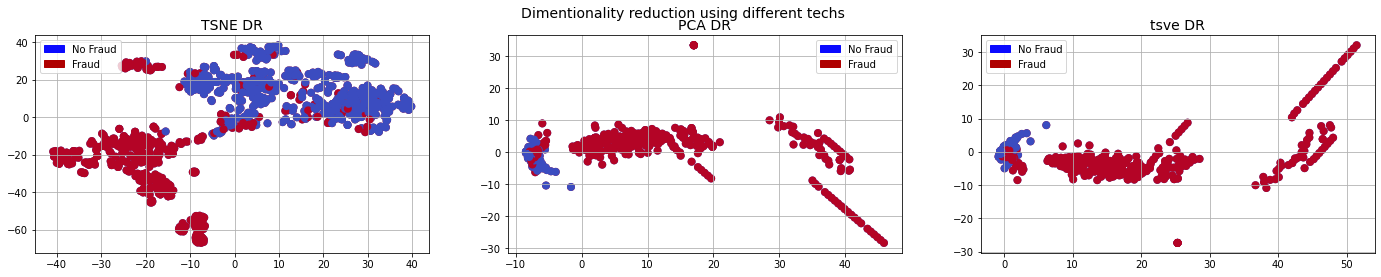

In [31]:

#lets implement dimentionality reduction:
#t-sne:
X_new_df=new_df.drop('Class', axis=1)
y_new_df=new_df['Class']
#t-sne
t0=time.time()
tsne_reduced=TSNE(n_components=2, random_state=42).fit_transform(X_new_df.values)
t1=time.time()
print('tsne took {:.2} s' .format(t1-t0))

#PCA
to=time.time()
PCA_reduced=PCA(n_components=2, random_state=12).fit_transform(X_new_df.values)
t1=time.time()
print('PCA took :{:.2} s' .format((t1-t0)))

#TruncatedSVD
t0=time.time()
tsvd_reduced=TruncatedSVD(n_components=2, random_state=11).fit_transform(X_new_df.values)
t1=time.time()
print('truncSVD took {:.2} s' .format((t1-t0)))

#lets visualize dimentionality reduction
#tsne
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(24,4))
fig.suptitle('Dimentionality reduction using different techs', fontsize=14)

blue_patch=mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch= mpatches.Patch(color='#AF0000', label='Fraud')

ax1.scatter(x=tsne_reduced[:,0],y=tsne_reduced[:,1], c=(y_new_df==0),cmap='coolwarm', 
            label='No Fraud', linewidths=2)
ax1.scatter(x=tsne_reduced[:,0],y=tsne_reduced[:,1], c=(y_new_df==1), cmap='coolwarm',
            label='Fraud', linewidths=2)
ax1.set_title('TSNE DR', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

#PCA

ax2.scatter(x=PCA_reduced[:,0],y=PCA_reduced[:,1], c=(y_new_df==0),cmap='coolwarm', 
            label='No Fraud', linewidths=2)
ax2.scatter(x=PCA_reduced[:,0],y=PCA_reduced[:,1], c=(y_new_df==1), cmap='coolwarm',
            label='Fraud', linewidths=2)
ax2.set_title('PCA DR', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

#TSVE
ax3.scatter(x=tsvd_reduced[:,0],y=tsvd_reduced[:,1], c=(y_new_df==0),cmap='coolwarm', 
            label='No Fraud', linewidths=2)
ax3.scatter(x=tsvd_reduced[:,0],y=tsvd_reduced[:,1], c=(y_new_df==1), cmap='coolwarm',
            label='Fraud', linewidths=2)
ax3.set_title('tsve DR', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.show()


In [32]:

#Classifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train,y_test= train_test_split(X_new_df, y_new_df, test_size=.2, 
                                                  random_state=3)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

classifiers={
    'logisticreg':LogisticRegression(),
    'knearest': KNeighborsClassifier(),
    'SVC': SVC(),
    'decisiontree': DecisionTreeClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score= cross_val_score(classifier, X_train, y_train, cv=5)
    print('Classifier:', classifier.__class__.__name__,'has a training score of ',
          round(training_score.mean(),2)*100, '% accuracy score')

#Grid search cv:
from sklearn.model_selection import GridSearchCV

log_reg_params={'penalty':['l1','l2'], 'C':[0.001, 0.01,0.1,1, 10,100, 1000]}

grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train, y_train)

log_reg_best_estim=grid_log_reg.best_estimator_

#knn
knears_params={'n_neighbors' : list(range(2,5,1)), 'algorithm':['auto','ball_tree',
                                                             'kd_tree', 'brute']}

grid_knn=GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knn.fit(X_train, y_train)
knn_best_estim=grid_knn.best_estimator_

#svc()

svc_params={'C':[0.5, 0.7,0.9,1], 'kernel':['rbf', 'poly','sigmoid','linear']}
grid_svc=GridSearchCV(SVC(),svc_params)
grid_svc.fit(X_train,y_train)

svc_best_estim=grid_svc.best_estimator_

#decisiontree

dt_params={'criterion':['gini','entropy'], 'max_depth' : list(range(2,4,1)),
           'min_samples_leaf': list(range(5,7,1))}
dt_grid=GridSearchCV(DecisionTreeClassifier(),dt_params)
dt_grid.fit(X_train,y_train)
dt_best_estim= dt_grid.best_estimator_

#lets compute the cross_val_score

log_reg_score= cross_val_score(log_reg_best_estim,X_train, y_train,cv=5)
print('log reg with best estimator having:',
      round(log_reg_score.mean()*100,2).astype(str) + '%')

knn_score=cross_val_score(knn_best_estim, X_train,y_train, cv=5)
print('knn has a score of:', round(knn_score.mean()*100,2).astype(str) + '%')

svc_score=cross_val_score(svc_best_estim,X_train,y_train,cv=5)
print('svc has a score of: ' , round(svc_score.mean()*100,2).astype(str) + '%')

dt_score=cross_val_score(dt_best_estim,X_train,y_train,cv=5)
print('dt has a score of: ' , round(dt_score.mean()*100,2).astype(str) + '%')


Classifier: LogisticRegression has a training score of  93.0 % accuracy score
Classifier: KNeighborsClassifier has a training score of  92.0 % accuracy score
Classifier: SVC has a training score of  94.0 % accuracy score
Classifier: DecisionTreeClassifier has a training score of  90.0 % accuracy score
log reg with best estimator having: 94.13%
knn has a score of: 93.2%
svc has a score of:  94.13%
dt has a score of:  92.4%


In [50]:

import imblearn
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
print('Before undersampling number of fraud cases {}'.format(sum(undersample_y == 1)))
print('Before undersampling number of non-fraud cases {}'.format(sum(undersample_y==0)))

near_X,near_y= NearMiss().fit_sample(original_X_train, original_y_train.ravel())
      
print('After undersampling number of fraud cases {}'.format(sum(near_y==1)))
print('After undersampling number of non-fraud cases {}'.format(sum(near_y==0)))



Before undersampling number of fraud cases 492
Before undersampling number of non-fraud cases 284315
After undersampling number of fraud cases 394
After undersampling number of non-fraud cases 394


In [56]:
#implementing log reg
from sklearn.linear_model import LogisticRegression
grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(near_X,near_y)
grid_log_reg_best_estim=grid_log_reg.best_estimator_


In [57]:
grid_log_reg_best_estim

LogisticRegression(C=100)

In [61]:
under_model=LogisticRegression(C=100)
under_model.fit(near_X,near_y)
preds=under_model.predict(original_X_test)


In [63]:
under_class_report=print(classification_report(original_y_test, preds))


              precision    recall  f1-score   support

           0       1.00      0.58      0.74     56863
           1       0.00      0.94      0.01        98

    accuracy                           0.58     56961
   macro avg       0.50      0.76      0.37     56961
weighted avg       1.00      0.58      0.73     56961



In [64]:
#we can see that the model has done well on the minority class and the recall value is also good.
#lets see for oversampling


In [65]:
tesvd_reduced

NameError: name 'tesvd_reduced' is not defined

In [66]:
tsvd_reduced

array([[-0.12886646,  0.20215359],
       [ 2.6919209 , -5.10299479],
       [-0.11958551, -0.18425097],
       ...,
       [ 9.40699267, -3.55428662],
       [-0.39694779,  0.16665701],
       [22.16022944, -1.18903084]])

In [70]:
print(' before oversampling the no of fraud sample {}' .format(sum(original_y_train==1)))
print('before oversampling the no of no-fraud sample {}' .format(sum(original_y_train==0)))
over_X, over_y= SMOTE().fit_sample(original_X_train, original_y_train)
under_model.fit(over_X,over_y)
print(' After oversampling the no of fraud sample {}' .format(sum(over_y==1)))
print('After oversampling the no of no-fraud sample {}' .format(sum(over_y==0)))
preds=under_model.predict(original_X_test)
over_score=print(classification_report(original_y_test, preds))    
    

 before oversampling the no of fraud sample 394
before oversampling the no of no-fraud sample 227452
 After oversampling the no of fraud sample 227452
After oversampling the no of no-fraud sample 227452
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.89      0.11        98

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.55     56961
weighted avg       1.00      0.98      0.99     56961



In [71]:
#As you can see SMOTE(oversampling) does pretty good at accuracy. the fraud case has good recall score of 89 %.

In [74]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


Using TensorFlow backend.


In [75]:
near_X

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.455586,-0.254594,1.927638,1.320291,-2.600122,3.933076,1.953219,0.034466,0.680236,-0.061683,...,-1.347176,-0.134579,-0.163703,-0.371098,0.013208,-0.049736,0.283204,-0.000671,-0.025361,0.001661
1,-0.160587,-0.293440,-0.465511,1.293542,0.909931,0.805013,0.329358,-1.316649,0.877948,-0.202594,...,-0.553549,-0.103891,0.051572,0.129026,-0.145944,0.586362,0.206361,-0.396964,-0.070669,0.051545
2,-0.063253,-0.293440,-0.272513,1.275378,0.814107,0.731147,0.461421,-1.122808,0.866315,-0.134538,...,-0.439844,-0.071516,0.018121,0.047025,-0.264227,0.258076,0.237335,-0.366500,0.053858,0.056949
3,-0.648563,-0.293440,-0.425745,1.379091,0.645260,0.697394,0.702898,-0.681755,0.816204,-0.048358,...,-0.838691,-0.106515,0.047356,0.135716,-0.248643,-0.071925,0.156898,-0.350277,-0.057853,0.057242
4,-0.336717,-0.293440,-0.153850,1.184735,0.959629,0.694453,0.518982,-1.084405,1.047888,-0.321175,...,-0.431945,-0.050043,-0.043759,0.024358,-0.303380,0.241342,0.188056,-0.392855,-0.112393,-0.168155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,0.964990,8.555858,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,...,0.873344,0.033804,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646
784,0.970947,4.570391,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,...,0.422342,0.650196,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711
785,0.994549,-0.296793,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637
786,1.001821,3.116048,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700


In [84]:
under_input=over_X.shape[1]

In [85]:
under_input

30

In [86]:
undersample= Sequential([
    Dense(under_input, input_shape=(under_input, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [87]:
undersample.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
undersample.fit(over_X, over_y, validation_split=0.2,batch_size=25, epochs=20, shuffle=True, verbose=2)


Train on 363923 samples, validate on 90981 samples
Epoch 1/20
 - 36s - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0108 - val_accuracy: 0.9982
Epoch 2/20
 - 49s - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0063 - val_accuracy: 0.9987
Epoch 3/20
 - 24s - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/20
 - 39s - loss: 0.0037 - accuracy: 0.9992 - val_loss: 9.3016e-04 - val_accuracy: 1.0000
Epoch 5/20
 - 18s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 3.6677e-04 - val_accuracy: 1.0000
Epoch 6/20
 - 18s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/20
 - 20s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 3.5844e-04 - val_accuracy: 1.0000
Epoch 8/20
 - 41s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 4.8377e-04 - val_accuracy: 1.0000
Epoch 9/20
 - 39s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.2179e-04 - val_accuracy: 1.0000
Epoch 10/20
 - 46s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 4.1561e-04 - val_

In [94]:
undersample_pred=undersample.predict(original_X_train, batch_size=200, verbose=2)

In [95]:
undersample_pred_class=undersample.predict_classes(original_X_train, batch_size=200, verbose=2)

In [99]:
undersample_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'title'

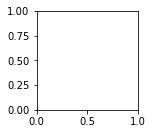

In [119]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
undersample_cm = confusion_matrix(original_y_train, undersample_pred_class)
actual_cm = confusion_matrix(original_y_test, original_y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(4,4))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

